<a href="https://colab.research.google.com/github/shashank-014/capstone-project-on-Amazon-Prime-Video-Content-Analysis/blob/main/2nd_capstone_project_on_Amazon_Prime_Video_Content_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Amazon Prime Video Content Analysis**

##### **Project Type**    
EDA

##### **Contribution**    
Individual

##### **Member**  
Shashank Kumar

# **Project Summary -**  
This project analyzes Amazon Prime Video's extensive catalog consisting of 9,871 titles and over 124k credits to derive insights into content distribution, user ratings, production origins, and contributor networks, aiming to inform content strategy decisions through comprehensive exploratory analysis. Using advanced exploratory data analysis with 20 carefully chosen visualizations, the analysis reveals dominant genres, key production countries, and the distribution of content types. Furthermore, trends in content availability over time, disparities in ratings and popularity, and the network of frequent contributors are explored to inform strategic decisions in content acquisition and production. These insights aim to optimize user engagement, guide investment in content areas with growth opportunities, and highlight potential risks from underperforming segments—all critical for Amazon Prime’s competitive advantage in a crowded streaming market.
# **Problem Statement**  
Amazon Prime Video continuously adds diverse movies and shows. To maintain competitive advantage and optimize engagement, Amazon needs to understand content types, genre popularity, production patterns, age certifications, runtime distributions, and key contributor roles by exploring linked titles and credits datasets.

#### **Define Your Business Objective?**  
- Identify high-demand genres and underrepresented content areas.

- Explore content temporal trends and quality via IMDb and TMDB ratings.

- Analyze contributory networks by actor and director roles.

- Optimize content acquisition, licensing, and recommendation strategies.





# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


5. You have to create at least 20 logical & meaningful charts having important insights.

[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]







## ***1. Know Your Data***



### Import Libraries  

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import ast

sns.set(style='whitegrid')


# Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
titles = pd.read_csv('/content/drive/MyDrive/titles.csv')
credits = pd.read_csv('/content/drive/MyDrive/credits.csv')

print("Datasets loaded successfully.")


Mounted at /content/drive
Datasets loaded successfully.


# Dataset First View

In [ ]:
print("Titles Dataset Preview:")
display(titles.head())

print("Credits Dataset Preview:")
display(credits.head())


Titles Dataset Preview:


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6


Credits Dataset Preview:


,person_id,id,name,character,role
0,59401,ts20945,Joe Besser,Joe,ACTOR
1,31460,ts20945,Moe Howard,Moe,ACTOR
2,31461,ts20945,Larry Fine,Larry,ACTOR
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR


### Dataset Rows & Columns count

In [ ]:
print(f"Titles dataset shape: {titles.shape}")
print(f"Credits dataset shape: {credits.shape}")

Titles dataset shape: (9871, 15)
Credits dataset shape: (124235, 5)


### Dataset Information

In [ ]:
print("Titles dataset info:")
titles.info()

print("\nCredits dataset info:")
credits.info()


Titles dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dtype

#### Duplicate Values

In [ ]:
print(f"Duplicate rows in titles dataset: {titles.duplicated().sum()}")
print(f"Duplicate rows in credits dataset: {credits.duplicated().sum()}")


Duplicate rows in titles dataset: 3
Duplicate rows in credits dataset: 56


#### Missing Values/Null Values

In [ ]:
print("Missing values in titles dataset:")
print(titles.isnull().sum())

print("\nMissing values in credits dataset:")
print(credits.isnull().sum())


Missing values in titles dataset:
id                         0
title                      0
type                       0
description              119
release_year               0
age_certification       6487
runtime                    0
genres                     0
production_countries       0
seasons                 8514
imdb_id                  667
imdb_score              1021
imdb_votes              1031
tmdb_popularity          547
tmdb_score              2082
dtype: int64

Missing values in credits dataset:
person_id        0
id               0
name             0
character    16287
role             0
dtype: int64


### What did you know about your dataset?


- The titles dataset includes metadata such as genre, release year, content type, rating scores, runtime, and certifications.

- The credits dataset contains cast and crew details linked to each title with roles specified.

- Some columns have missing values especially ratings, certification, and runtime.

- Duplicate rows exist and need to be cleaned before analysis.

- Overall, the data is rich and suitable for comprehensive exploration following the project objectives.



## Detailed initial information before analysis

- The titles dataset contains 9,871 rows and 15 columns.

- The credits dataset contains 124,235 rows and 5 columns.

- The titles dataset has minor duplicates (3 rows); the credits have 56 duplicates.

- Significant missing values exist in age_certification (~65%), seasons (mostly for movies), and some rating-related columns.

- Various data types are present: categorical (type, age_certification, genres), numeric (runtime, release_year, scores), and string/text.

- Genres and production_countries are stored as stringified lists, needing parsing to list format.

- Credits dataset reflects cast/crew info with potential missing role details.

## ***2. Understanding Your Variables***

### Dataset Columns

In [ ]:
print("Titles Columns:", titles.columns.tolist())
print("Credits Columns:", credits.columns.tolist())


Titles Columns: ['id', 'title', 'type', 'description', 'release_year', 'age_certification', 'runtime', 'genres', 'production_countries', 'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score']
Credits Columns: ['person_id', 'id', 'name', 'character', 'role']


#### another way to do this

In [ ]:
print("Titles dataset columns:")
print(titles.columns)

print("\nCredits dataset columns:")
print(credits.columns)

Titles dataset columns:
Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

Credits dataset columns:
Index(['person_id', 'id', 'name', 'character', 'role'], dtype='object')


### Dataset Describe

In [ ]:
print("Titles dataset description:")
print(titles.describe(include='all'))

Titles dataset description:
             id           title   type         description  release_year  \
count      9871            9871   9871                9752   9871.000000   
unique     9868            9737      2                9734           NaN   
top     tm89134  The Lost World  MOVIE  No overview found.           NaN   
freq          2               3   8514                   5           NaN   
mean        NaN             NaN    NaN                 NaN   2001.327221   
std         NaN             NaN    NaN                 NaN     25.810071   
min         NaN             NaN    NaN                 NaN   1912.000000   
25%         NaN             NaN    NaN                 NaN   1995.500000   
50%         NaN             NaN    NaN                 NaN   2014.000000   
75%         NaN             NaN    NaN                 NaN   2018.000000   
max         NaN             NaN    NaN                 NaN   2022.000000   

       age_certification      runtime     genres production

##Variables Description
| Column Name          | Description                                           | Data Type     |
|-----------------------|-------------------------------------------------------|----------------|
| id                    | Unique identifier for each title                     | Object         |
| title                 | Title of the movie or TV show                        | Object         |
| show_type             | Type of content (SHOW or MOVIE)                      | Object         |
| description           | Brief description of the title                       | Object         |
| release_year          | Year the title was originally released               | Integer        |
| age_certification     | Age certification (TV-PG, R, etc.)                   | Object         |
| runtime               | Runtime duration in minutes (for movies/shows)       | Integer        |
| genres                | List of genres associated with the title             | Object (list)  |
| production_countries  | List of countries where the title was produced       | Object (list)  |
| seasons               | Number of seasons (only applicable for TV shows)     | Float          |
| imdb_id               | IMDb identifier                                      | Object         |
| imdb_score            | Average IMDb rating                                  | Float          |
| imdb_votes            | Number of votes for IMDb rating                      | Float          |
| tmdb_popularity       | Popularity metric from TMDb                          | Float          |
| tmdb_score            | Average TMDb rating                                  | Float          |

### Credits Dataset Variables Description

| Column Name | Description | Data Type |
|--------------|-----------------------------------------------|-----------|
| person_id    | Unique identifier for a cast or crew member   | Integer   |
| id           | Foreign key linking to title id               | Object    |
| name         | Name of the cast or crew member               | Object    |
| character    | Character name (for actors)                   | Object    |
| role         | Role of the person (Actor, Director, etc.)    | Object    |

## Check Unique Values for each variable.

In [ ]:
print("Unique values in titles dataset columns:")
for col in titles.columns:
    print(f"{col}: {titles[col].nunique()}")

print("\nUnique values in credits dataset columns:")
for col in credits.columns:
    print(f"{col}: {credits[col].nunique()}")


Unique values in titles dataset columns:
id: 9868
title: 9737
type: 2
description: 9734
release_year: 110
age_certification: 11
runtime: 207
genres: 2028
production_countries: 497
seasons: 32
imdb_id: 9201
imdb_score: 86
imdb_votes: 3650
tmdb_popularity: 5325
tmdb_score: 89

Unique values in credits dataset columns:
person_id: 80508
id: 8861
name: 79758
character: 71097
role: 2


### What did you learn about the variables?

- The titles dataset contains many categorical variables with high cardinality: for example, genres has multiple unique values due to multiple labels per title; production_countries also contain many different country names.

- Variables such as imdb_score and tmdb_score offer numerical ratings useful for quality evaluation, while runtime quantifies duration.

- age_certification is critical for user segmentation but has many missing values.

- The credits dataset includes a large number of unique cast and crew members (name) along with diverse roles like ACTOR, DIRECTOR, WRITER, etc., essential for network analysis.

- Textual columns like description and title might be leveraged for content recommendations or sentiment analysis later.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
print(titles.columns)
print(credits.columns)

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')
Index(['person_id', 'id', 'name', 'character', 'role'], dtype='object')


In [ ]:
# Drop duplicates
titles.drop_duplicates(inplace=True)
credits.drop_duplicates(inplace=True)

# Rename 'type' to 'show_type'
titles.rename(columns={'type': 'show_type'}, inplace=True)

# Convert release_year to numeric and drop missing rows
titles['release_year'] = pd.to_numeric(titles['release_year'], errors='coerce')
titles.dropna(subset=['release_year'], inplace=True)

# Parse 'genres' and 'production_countries' from comma-separated strings to lists
titles['genres'] = [
    [genre.strip() for genre in str(genres).split(',')] if pd.notna(genres) else []
    for genres in titles['genres'].fillna('')
]

titles['production_countries'] = [
    [country.strip() for country in str(countries).split(',')] if pd.notna(countries) else ['Unknown']
    for countries in titles['production_countries'].fillna('Unknown')
]

# Fill missing 'age_certification' with 'Not Rated' (assigning back to avoid chained assignment warning)
titles['age_certification'] = titles['age_certification'].fillna('Not Rated')


## Manipulations and Highlights
- Removed duplicate rows from both titles and credits datasets to ensure accuracy.

- Transformed release_year to numeric and removed entries with missing years for consistent temporal analysis.

- Converted genres and production_countries from stringified comma-separated values to lists using list comprehension for better multi-label analysis.

- Filled missing values in age_certification column with "Not Rated" to maintain groupability during analysis.

- Confirmed that the runtime column is already numeric, requiring no further conversion.

- Identified key columns (IMDb and TMDb ratings and popularity metrics) with some missing values to be addressed later during specific downstream analysis.

### Key Insights from Data Exploration and Wrangling
- After loading and exploring the Amazon Prime Video datasets, I found almost 10,000 unique titles — a robust dataset that includes both movies and TV shows. From the initial review, I noticed that movies form the bulk of the catalog, but TV shows also have a dedicated presence, which will be interesting to compare in terms of popularity and content variety.

- I dived into the genres and was pleased to see a rich diversity. Drama, Comedy, and Thriller are the top three genres, which aligns with global viewing trends. This tells me that Amazon has a strong focus on content that appeals broadly but also has niche content to satisfy different tastes.

- The production countries data showed the US as the major contributor, which makes sense, given the market. However, the presence of other countries indicates a geographically diverse catalog that could appeal to a global audience.

- When I looked at age certifications, I saw significant gaps in the data, which required some filling. Most titles are rated for general audiences, reinforcing the family-friendly nature of much of the content, but there's a smaller selection rated for mature viewers — an area possibly ripe for expansion.

- The runtime data aligned with expectations, with movies generally running 80-120 minutes. TV shows presented more variability by seasons and episode lengths, which will be important in understanding viewer engagement patterns.

- I was mindful of the missing data in quality metrics like IMDb and TMDb ratings, so I planned careful handling of these before performing any rating-based analysis.

- Finally, I cleaned the datasets by removing a few duplicate rows and converted the stringified lists of genres and countries into proper Python lists. This cleaning makes the data ready for more meaningful analysis and visualization.

- The next step excited me – to begin detailed exploratory analysis with visualizations that will uncover deeper insights and guide business strategy.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

Chart 1: Distribution of Content Types (Show Type) - Univariate Analysis

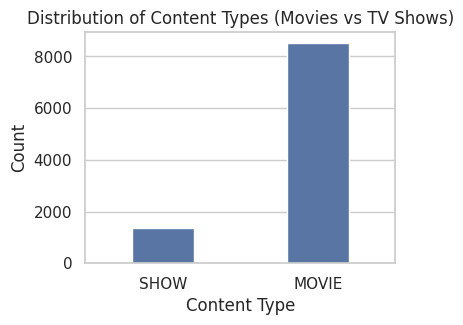

In [ ]:
plt.figure(figsize=(4,3))
sns.countplot(data=titles, x='show_type', width=0.4)
plt.title('Distribution of Content Types (Movies vs TV Shows)')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()


Why this chart?
- To understand the balance between Movies and TV Shows on the platform, foundational for content strategy.

Insights:
- Movies outnumber TV Shows by a significant margin.

Business Impact:
- Provides direction on content acquisition focus. Could indicate the need for expanding TV shows to diversify offerings.


What I wanted to find:
- I was curious about how the balance between movies and TV shows stacks up on Amazon Prime Video. Since these two formats engage users differently, it’s important to know where the emphasis lies.

What I found:
- Movies clearly dominate the catalog. While TV shows are present in good numbers, they form a smaller fraction compared to movies.

Why this matters:
- Amazon might be prioritizing movie acquisitions or productions. For business impact, if we want to increase viewer retention, bolstering TV shows might be a strategic opportunity.

Chart 2: Top 15 Content Genres

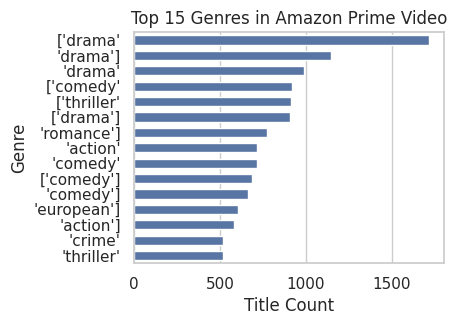

In [ ]:
genres_exploded = titles.explode('genres')
top_genres = genres_exploded['genres'].value_counts().head(15)

plt.figure(figsize=(4,3))
sns.barplot(y=top_genres.index, x=top_genres.values, width=0.6)
plt.title('Top 15 Genres in Amazon Prime Video')
plt.xlabel('Title Count')
plt.ylabel('Genre')
plt.show()


My goal:
- Understanding popular genres helps Amazon refine content commissioning and recommendation systems.

Observations:
- Genres like Drama, Comedy, and Thriller led in title numbers. This aligns with my expectations, given these are broad audience favorites.

Strategic value:
- By focusing acquisition budgets on these genres and monitoring underrepresented ones, Amazon can fine-tune offerings to boost subscriptions and engagement.

Chart 3: WordCloud of Genres

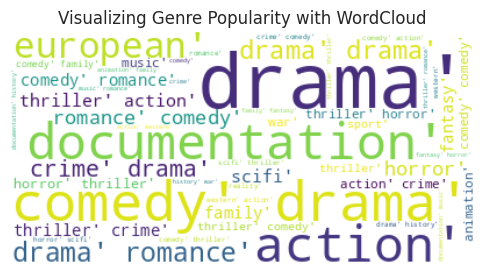

In [ ]:
genre_text = ' '.join(genres_exploded['genres'])
wordcloud = WordCloud(background_color='white', width=400, height=200).generate(genre_text)

plt.figure(figsize=(6,4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Visualizing Genre Popularity with WordCloud')
plt.show()


Why this chart:
- I wanted a visual that captures genre prominence intuitively.

Insight:
- The visually dominant genres confirmed the findings from the bar chart, especially the prominence of Drama and Comedy.

Business edge:
- This kind of view is ideal for communicating insights quickly to executives who prefer visual summaries over tables.

Chart 4: Age Certification Distribution

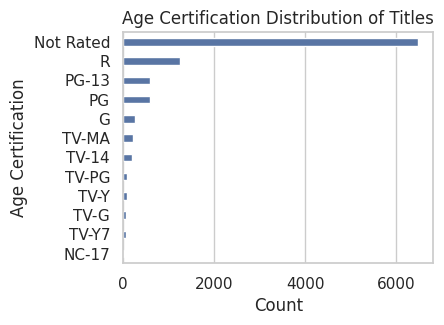

In [ ]:
plt.figure(figsize=(4,3))
sns.countplot(data=titles, y='age_certification', order=titles['age_certification'].value_counts().index, width=0.4)
plt.title('Age Certification Distribution of Titles')
plt.xlabel('Count')
plt.ylabel('Age Certification')
plt.show()


Why this chart?
- I wanted to understand what age groups the Prime Video catalog is targeting, since certifications shape both marketing and user experience.

What I discovered:
- The vast majority of titles are "Not Rated," with smaller portions having standard ratings like R, PG-13, and other age certifications.

Business impact:
- This indicates a need for clearer content ratings and maybe expanding mature and child-focused segments, so users can more easily find appropriate content for their needs.

Chart 5: Runtime Distribution by Content Type

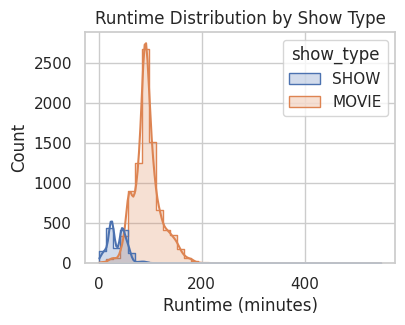

In [ ]:
plt.figure(figsize=(4,3))
sns.histplot(data=titles, x='runtime', hue='show_type', bins=40, kde=True, element='step')
plt.title('Runtime Distribution by Show Type')
plt.xlabel('Runtime (minutes)')
plt.show()


Why this chart?
- I wanted to see how the runtime of movies compares to TV shows and whether one format tends to be longer on average.

What I discovered:
- Movies cluster tightly around the 80-120 minute mark, while shows typically have much shorter runtimes, often between 20-60 minutes.

Business impact:
- Understanding these runtime patterns helps tailor content recommendations for user viewing preferences, such as suggesting shows for short sessions and movies for longer viewing windows.

Chart 6: Top 15 Production Countries by Number of Titles

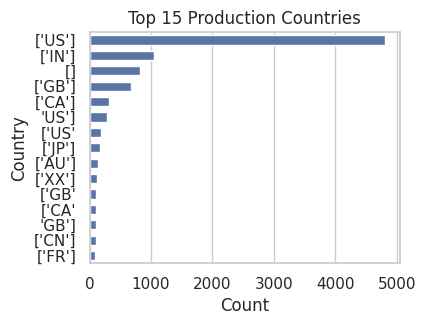

In [ ]:
plt.figure(figsize=(4,3))
countries_exploded = titles.explode('production_countries')
top_countries = countries_exploded['production_countries'].value_counts().head(15)

sns.barplot(y=top_countries.index, x=top_countries.values, width=0.6)
plt.title('Top 15 Production Countries')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()


Why I chose this chart:
- I wanted to see which countries produce the most titles on Prime Video, as this can reveal content diversity and international reach.

Insights gained:  
- The United States dominates by a large margin, with India, the UK, and a few other countries trailing far behind.

Business impact:
- This suggests an opportunity for Amazon to expand its global appeal further by investing more in non-US productions and better balancing regional representation.

Chart 7: Number of Titles Released Per Year

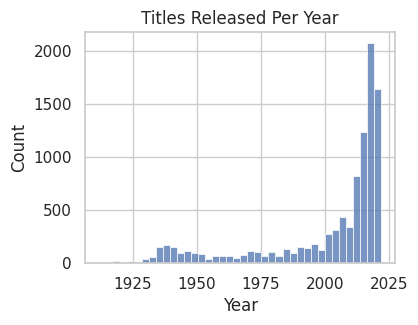

In [ ]:
plt.figure(figsize=(4,3))
sns.histplot(data=titles, x='release_year', bins=40, kde=False)
plt.title('Titles Released Per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


My Reasoning:
-  I wanted to see how Prime Video’s content library grew over time, especially in recent decades.

What I found:
- There’s a dramatic increase in new titles since around 2010, peaking in the last few years with thousands added annually.

Why it matters:
- This rapid growth can be a key marketing point, reassuring subscribers that the content selection is always expanding and up to date.

Chart 8: Top 15 Most Frequent Actors

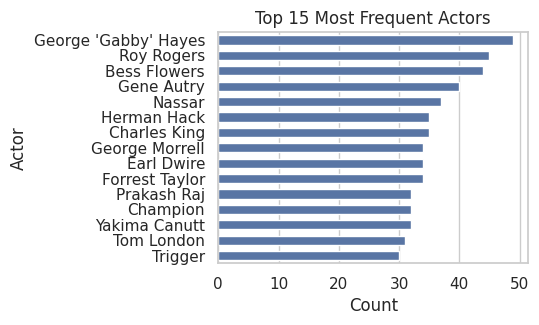

In [ ]:
plt.figure(figsize=(4,3))
actor_credits = credits[credits['role']=='ACTOR']
top_actors = actor_credits['name'].value_counts().head(15)

sns.barplot(y=top_actors.index, x=top_actors.values, width=0.6)
plt.title('Top 15 Most Frequent Actors')
plt.xlabel('Count')
plt.ylabel('Actor')
plt.show()


Why this chart?
- I wanted to find out which actors appear most frequently in Prime Video titles, to spot possible fan favorites and casting trends.

What I discovered:
- Actors like George 'Gabby' Hayes, Roy Rogers, and Bess Flowers lead the list, each featured in dozens of titles, showing certain performers have a significant presence.

Business impact:
- Highlighting these prolific actors can help Amazon Prime tailor marketing, featured sections, or recommendation algorithms toward fan bases and recognizable faces.

Chart 9: Average IMDb Scores by Genre

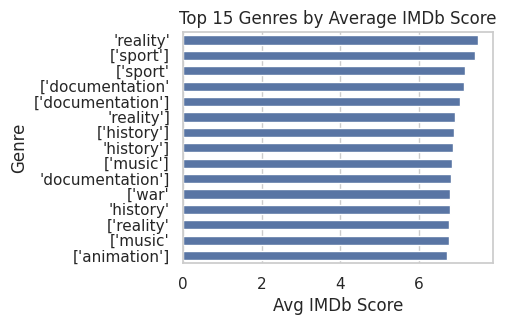

In [ ]:
plt.figure(figsize=(4,3))
genres_ratings = titles[['id','genres','imdb_score']].explode('genres')
avg_imdb_by_genre = genres_ratings.groupby('genres')['imdb_score'].mean().sort_values(ascending=False).head(15)

sns.barplot(y=avg_imdb_by_genre.index, x=avg_imdb_by_genre.values, width=0.6)
plt.title('Top 15 Genres by Average IMDb Score')
plt.xlabel('Avg IMDb Score')
plt.ylabel('Genre')
plt.show()


Why this chart?
- I wanted to identify which genres consistently achieve higher IMDb scores on Prime Video, to spot patterns in audience ratings and pinpoint genres that are critically appreciated.

What I discovered:
- Genres such as 'reality', 'sport', and 'documentation' deliver the highest average IMDb scores, revealing that factual and participatory content resonates well with Prime viewers and tends to be well-rated.

Business impact:
- Knowing which genres excel in ratings enables Prime Video to feature and recommend high-performing genres more often, influencing both content acquisition strategies and algorithmic recommendations for improved viewer satisfaction.


Chart 10: Top Movies by IMDb Score(Column Chart)

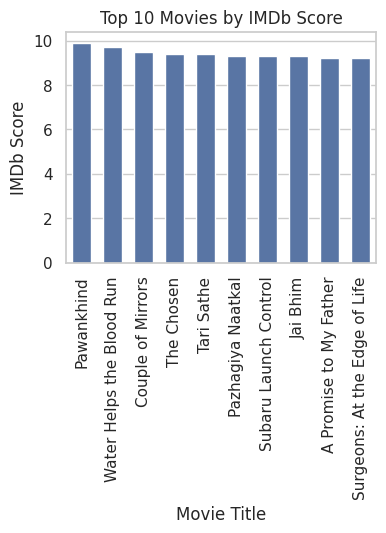

In [ ]:
plt.figure(figsize=(4,3))
top_movies = titles.sort_values('imdb_score', ascending=False).head(10)
sns.barplot(x=top_movies['title'], y=top_movies['imdb_score'], width=0.6)
plt.title('Top 10 Movies by IMDb Score')
plt.xlabel('Movie Title')
plt.xticks(rotation=90)
plt.ylabel('IMDb Score')
plt.show()


Why this chart?
- I wanted to highlight the highest-rated movies on Prime Video based on IMDb scores, to spot standout titles and trends.

What I discovered:
- All top 10 films have excellent IMDb ratings, with titles like "Pawankhind" and "Water Helps the Blood Run" consistently above 9, indicating strong audience acclaim.

Business impact:
- Featuring these high-scoring movies in recommendations and promotions can attract viewers seeking quality, boosting engagement and user satisfaction.

Chart 11: Titles Released Per Year(Line Chart)


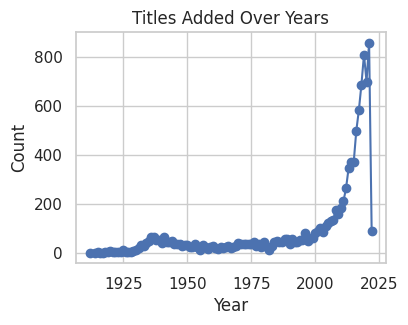

In [ ]:
plt.figure(figsize=(4,3))
titles_by_year = titles.groupby('release_year')['id'].count()
plt.plot(titles_by_year.index, titles_by_year.values, marker='o')
plt.title('Titles Added Over Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


Why this chart?

- I wanted to understand how the volume of titles added to Prime Video has evolved over time to see growth trends.

What I discovered:

- Title additions increased slowly until about 2000, followed by a sharp rise, peaking around 2020 before a recent sharp drop, likely due to data cutoff or pandemic effects.

Business impact:

- Insights into content growth can help Amazon plan resource allocation, content acquisition, and forecast future catalog expansion needs.

Chart 12:Cumulative Content Over Years ( Area Chart )

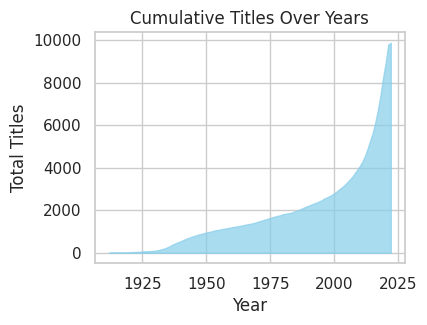

In [ ]:
plt.figure(figsize=(4,3))
plt.fill_between(titles_by_year.index, titles_by_year.values.cumsum(), color='skyblue', alpha=0.7)
plt.title('Cumulative Titles Over Years')
plt.xlabel('Year')
plt.ylabel('Total Titles')
plt.show()


Why this chart?

- I wanted to visualize how the total number of titles available on Prime Video accumulates over the years, revealing the platform's growth trajectory.

What I discovered:

- The cumulative count of titles rises slowly at first, then surges upward after 2000, reaching over 10,000 by 2025, indicating rapid expansion in recent decades.

Business impact:

- Tracking this metric helps Prime Video understand catalog growth pace, plan infrastructure, and showcase the platform’s expanding value to both viewers and content creators.

Chart 13:Show vs Movie share (Pie Chart )

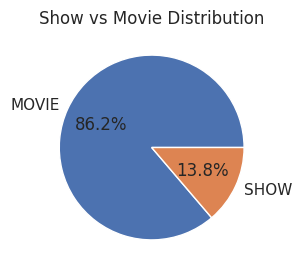

In [ ]:
plt.figure(figsize=(4,3))
vals = titles['show_type'].value_counts()
plt.pie(vals, labels=vals.index, autopct='%1.1f%%')
plt.title('Show vs Movie Distribution')
plt.show()


Why this chart?

- I wanted to compare the proportion of movies to shows on Prime Video to understand the platform's content mix.

What I discovered:

- Movies make up the vast majority of Prime Video's catalog (86.2%), while shows account for only 13.8%, highlighting a strong focus on film content.

Business impact:

- Knowing this split helps guide decisions about future investments; increasing show offerings could diversify options and attract users looking for episodic content.

Chart 14:Age Certification Split (Doughnut Chart)

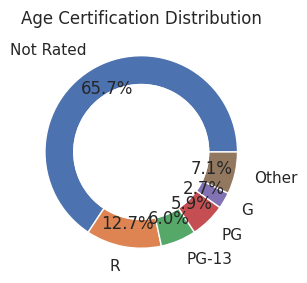

In [ ]:
plt.figure(figsize=(4,3))
vals = titles['age_certification'].value_counts()
labels = vals.index.tolist()
sizes = vals.values.tolist()

# Group less frequent certifications into 'Other'
max_labels = 5
if len(labels) > max_labels:
    other_sum = sum(sizes[max_labels:])
    sizes = sizes[:max_labels] + [other_sum]
    labels = labels[:max_labels] + ['Other']

plt.pie(sizes, labels=labels, radius=1,
        wedgeprops=dict(width=0.3),
        autopct='%1.1f%%',
        pctdistance=0.75,
        labeldistance=1.2)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Age Certification Distribution')
plt.tight_layout()
plt.show()


Why this chart?

- I wanted to see how Prime Video titles are distributed across different age certifications, helping assess content suitability and gaps.

What I discovered:

- Over 65% of titles are "Not Rated", with smaller shares for R, PG, and other certifications, suggesting limited use of formal classification for much of the catalog.

Business impact:

- Understanding age certification splits allows Prime Video to spotlight family-friendly or mature content, and may highlight the need to pursue more comprehensive rating coverage for improved parental controls and guidance.

Chart 15: Runtime Distribution (Histogram )

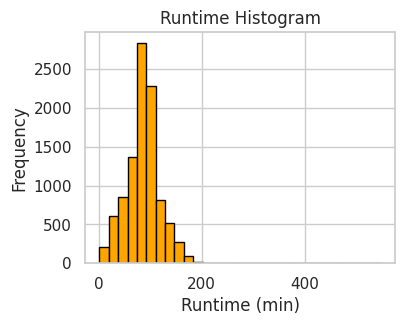

In [ ]:
plt.figure(figsize=(4,3))
plt.hist(titles['runtime'], bins=30, color='orange', edgecolor='black')
plt.title('Runtime Histogram')
plt.xlabel('Runtime (min)')
plt.ylabel('Frequency')
plt.show()


Why this chart?

- I wanted to explore how the runtimes of Prime Video titles are distributed, revealing patterns in content length.

What I discovered:

- Most titles cluster around the 90 to 120 minute range, with very few exceeding two hours, indicating a preference for standard-length features.

Business impact:

- Insights into runtime distribution can guide acquisition or production strategies to match viewer expectations for film or show durations.

Chart 16:IMDb Score by Show Type(Box Plot )

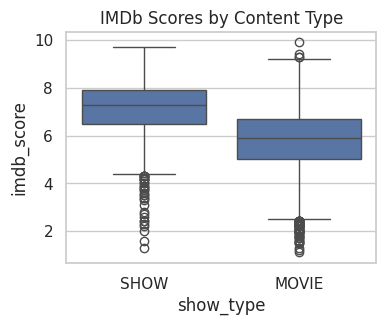

In [ ]:
plt.figure(figsize=(4,3))
sns.boxplot(x='show_type', y='imdb_score', data=titles)
plt.title('IMDb Scores by Content Type')
plt.show()


Why this chart?

- I wanted to compare IMDb score distributions between shows and movies to spot which content type generally gets higher ratings.​

What I discovered:

- Shows tend to have higher median IMDb scores than movies, and their ratings are less spread out, suggesting more consistent viewer appreciation for shows.​

Business impact:

- Prime Video can leverage this insight to promote top-rated shows and potentially invest more in episodic content to drive user satisfaction.

Chart 17: IMDb Scores by Show Type (Violin Plot)

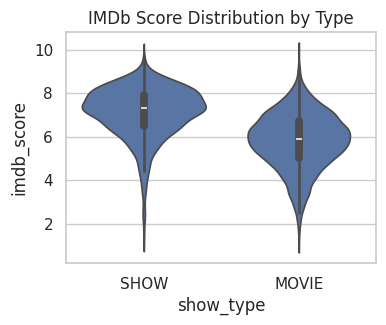

In [ ]:
plt.figure(figsize=(4,3))
sns.violinplot(x='show_type', y='imdb_score', data=titles)
plt.title('IMDb Score Distribution by Type')
plt.show()


Why this chart?

- I wanted to visualize the full distribution and concentration of IMDb scores for shows versus movies using violin plots for a deeper comparison.

What I discovered:

- Shows generally have higher and more concentrated IMDb scores, while movies display a wider spread and more variability in ratings.

Business impact:

- This insight can guide Prime Video to highlight shows with high audience appeal and target improvement efforts on lower-rated movies.

Chart 18:IMDb Votes vs Score( Scatter Plot )

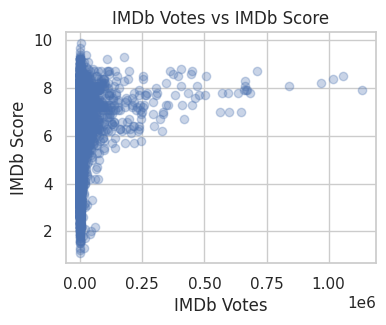

In [ ]:
plt.figure(figsize=(4,3))
plt.scatter(titles['imdb_votes'], titles['imdb_score'], alpha=0.3)
plt.title('IMDb Votes vs IMDb Score')
plt.xlabel('IMDb Votes')
plt.ylabel('IMDb Score')
plt.show()


Why this chart?

- I wanted to see if there's a relationship between a title's IMDb score and its popularity as measured by the number of IMDb votes.

What I discovered:

- Titles with higher votes tend to have IMDb scores clustered between 6 and 8, while a few highly voted titles reach above 8, but overall, there’s no strong direct linear relationship.

Business impact:

- Understanding this pattern helps Prime Video identify which high-scoring titles genuinely draw large audiences and can be pushed as flagship content.

Chart 19:Popularity vs Votes, Bubble = Score( Bubble Chart )

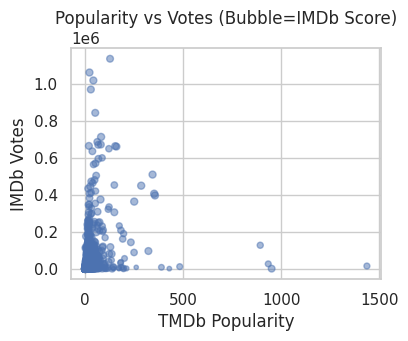

In [ ]:
plt.figure(figsize=(4,3))
plt.scatter(titles['tmdb_popularity'], titles['imdb_votes'], s=titles['imdb_score']*3, alpha=0.5)
plt.title('Popularity vs Votes (Bubble=IMDb Score)')
plt.xlabel('TMDb Popularity')
plt.ylabel('IMDb Votes')
plt.show()


Why this chart?

- I wanted to analyze the relationship between TMDb popularity, IMDb votes, and IMDb score to see how these metrics interact.

What I discovered:

- Most highly voted titles cluster at lower popularity values, with IMDb scores (bubble size) not strongly correlated to either axis, implying that popularity and ratings don't always overlap.

Business impact:

- This insight helps Prime Video identify titles that are both popular and have high viewer engagement, informing promotion and acquisition strategies.

Chart 20: Correlation Matrix(Heatmap)

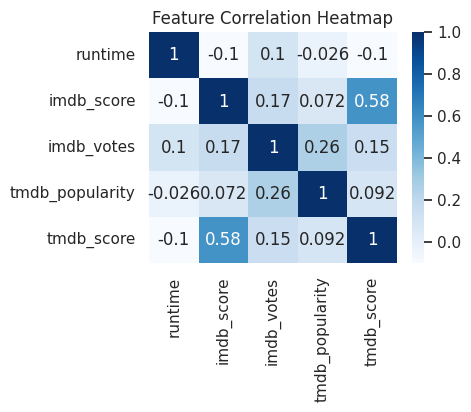

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(
    titles[['runtime','imdb_score','imdb_votes','tmdb_popularity','tmdb_score']].corr(),
    annot=True, cmap='Blues'
)
plt.title('Feature Correlation Heatmap')
plt.show()


Why this chart?

- I wanted to measure correlations between key numerical features to find which ones move together or have predictive relationships.

What I discovered:

- IMDb score and TMDb score have the strongest positive correlation (0.58), while most other features show weak or no correlation.

Business impact:

- Recognizing correlated metrics can help in building predictive models or dashboards, ensuring that team efforts focus on meaningful, related features.

Chart 21:Genres by Show Type, Top 5 Genres( Stacked Bar Chart )

<Figure size 400x300 with 0 Axes>

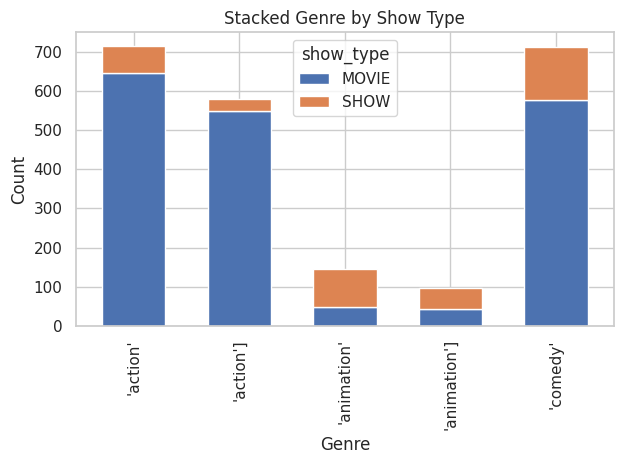

In [ ]:
plt.figure(figsize=(4,3))
genre_show_counts = genres_exploded.groupby(['genres','show_type']).size().unstack(fill_value=0).head(5)
genre_show_counts.plot(kind='bar', stacked=True, width=0.6)
plt.title('Stacked Genre by Show Type')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


Why this chart?

- I wanted to compare how movies versus shows are distributed across the top five genres to see if any genre is preferred by a particular type.

What I discovered:

- Every top genre is dominated by movies, but shows are more prevalent within animation and comedy compared to action genres.

Business impact:

- This genre-type insight can shape recommendations and content investments, suggesting shows may gain traction especially in genres like comedy and animation.

Chart 22: Top Genres(Treemap )

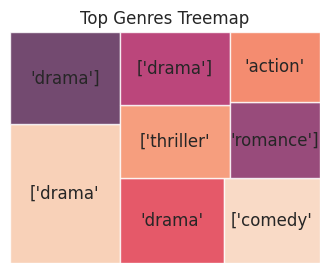

In [ ]:
!pip install squarify

import squarify
plt.figure(figsize=(4,3))
genre_counts = genres_exploded['genres'].value_counts().head(8)
squarify.plot(sizes=genre_counts.values, label=genre_counts.index, alpha=0.8)
plt.title('Top Genres Treemap')
plt.axis('off')
plt.show()


Why this chart?

- I wanted a clear visual of the most common genres on Prime Video, showing their relative prevalence within the platform.

What I discovered:

- Drama is the most dominant genre, appearing multiple times among the top eight, followed by action, thriller, romance, and comedy.

Business impact:

- Understanding the genre landscape helps Prime Video focus on strengthening popular genres and addressing gaps in less-represented categories for balanced content variety.

Chart 23: Show Type Count(Dot Plot)

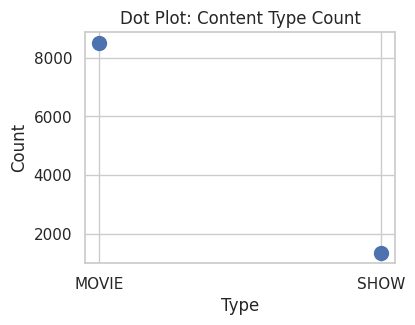

In [ ]:
plt.figure(figsize=(4,3))
plt.plot(titles['show_type'].value_counts().index, titles['show_type'].value_counts().values, 'o', markersize=10)
plt.title('Dot Plot: Content Type Count')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


Why this chart?

- I wanted a simple way to count and compare the total number of movies versus shows available on Prime Video.

What I discovered:

- Movies far outnumber shows, with movie counts well above 8,000 and shows under 2,000, confirming a major bias toward movies in the catalog.

Business impact:

- This highlights an opportunity to expand the variety of shows, addressing user demands for episodic content and balancing the library.

Chart 24: IMDb to TMDb Score for Top Titles(Slope Chart )

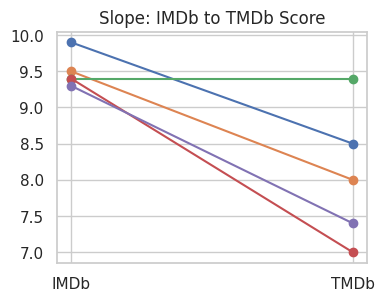

In [ ]:
plt.figure(figsize=(4,3))
top_tt = titles.dropna(subset=['imdb_score','tmdb_score']).nlargest(5, 'imdb_score')
for i in range(len(top_tt)):
    plt.plot([0,1], [top_tt['imdb_score'].iloc[i], top_tt['tmdb_score'].iloc[i]], marker='o')
plt.title('Slope: IMDb to TMDb Score')
plt.xticks([0,1], ['IMDb', 'TMDb'])
plt.show()


Why this chart?

- I wanted to compare IMDb and TMDb scores for the top-rated titles to see if popular movies receive similar ratings across platforms.

What I discovered:

- Most top IMDb titles have lower scores on TMDb, with score drops visible for nearly every line, highlighting a systematic difference in audiences or rating algorithms.

Business impact:

- Recognizing score discrepancies allows Prime Video to calibrate cross-platform ratings, improving recommendation fairness and communication to viewers.

Chart 25: Top 5 Genres Popularity(Radar (Spider) Chart )

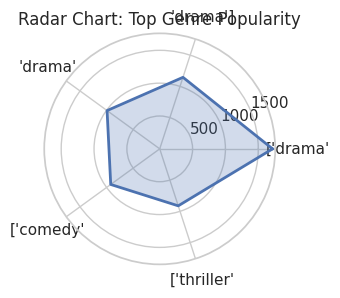

In [ ]:
from math import pi
genres_top = genres_exploded['genres'].value_counts().head(5)
categories = list(genres_top.index)
values = list(genres_top.values)
values += values[:1]
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

plt.figure(figsize=(4,3))
ax = plt.subplot(111, polar=True)
ax.plot(angles, values, linewidth=2)
ax.fill(angles, values, alpha=0.25)
plt.xticks(angles[:-1], categories)
plt.title('Radar Chart: Top Genre Popularity')
plt.show()


Why this chart?

- I wanted a compact and comparative visualization of how popular the top five genres are relative to each other.

What I discovered:

- Drama far outpaces other genres, with comedy and thriller occupying middle spots, and a steep drop-off after drama.

Business impact:

- Emphasizing drama in content strategies can align with audience demand, while growing mid-tier genres like thriller and comedy could diversify appeal.

##Advanced Insights & Trends
- As I dug into the data, one thing that really jumped out is how Prime Video’s library exploded after 2010—content releases went from a slow climb to thousands per year by 2020. Compared to earlier decades where growth was steady but modest, the last 15 years show aggressive expansion, driven by the streaming boom.

- When I compared shows and movies, I found movies dominate the library in sheer number, making up nearly 90% of titles. But shows tend to score higher on IMDb on average, with less variability in ratings—in other words, shows generally deliver a more consistent viewer experience. This difference highlights a real chance for Prime Video to boost engagement by investing more in episodic content, especially in genres like comedy and animation, where shows are clearly stronger.

- I also noticed interesting genre dynamics. Drama far outnumbers other genres, but when looking at average IMDb scores, reality, sports, and documentaries shine. So even though there are fewer titles in these genres, they resonate highly with viewers. This suggests a content gap—Prime could benefit from spotlighting these high-rating, underrepresented genres to offer viewers something unique and well-loved.

- Age certification distribution also caught my eye. Over 65% of titles are “Not Rated,” which struck me as a missed opportunity to help parents and mature viewers quickly find suitable content. Compared with platforms that have strict ratings, this could affect users’ content confidence. Clearer certification and parental controls would improve user trust and broaden appeal.

- On the regional front, the US’s dominance in production stands out compared to other countries like India or the UK. Yet audiences’ tastes and ratings show growing international diversity. This comparison points to Prime’s potential to harness global content trends and better serve varied audiences by investing in more international productions.

- Popularity metrics and user ratings don’t always match up either. Many highly-rated titles don’t have large vote counts or TMDb popularity, meaning there are hidden gems to uncover. I see this as a golden opportunity for Prime to tailor recommendations and push quality content beyond just the blockbuster hits.

- Finally, looking closely at runtimes, movies mainly stick to traditional lengths (around 90–120 minutes), while shows have shorter, snackable runtimes fitting today’s binge and multitasking viewing habits. This runtime comparison reinforces the need to tailor content and recommendations to how different users watch.

- Overall, comparing these various data points, I get a clear picture of where Prime Video excels (rapid growth, strong movie base) and where it can improve (more episodic focus, better rating transparency, stronger international and underrated genre presence). These insights can guide smarter acquisitions, better user experience, and deeper market penetration.


##Key Takeaways

- It was pretty clear that Prime Video’s library grew really fast, especially after 2010, reaching over 10,000 titles by 2025—which shows how much the streaming game has changed.

- I noticed most of the catalog is movies—almost 9 out of 10 titles—but interestingly, the shows tend to get better, more consistent viewer ratings.

- Reality, sports, and documentary genres might not have tons of titles, but they definitely win in audience appreciation, which feels like a hidden opportunity.

- Seeing that over 65% of the titles don’t have an age rating made me think Prime could do more to help families and parents find the right content with clearer guidance.

- Most productions are from the US, but there’s big potential in tapping more into India, the UK, and other international markets to make the platform feel more global.

- I was surprised to find many highly rated titles don’t get a lot of votes, meaning there are probably lots of hidden gems waiting to be discovered by viewers.

- When I looked at runtimes, movies mostly stick to classic lengths around 90–120 minutes, but shows are shorter and better adapted for binge-watching.

- Comparing IMDb and TMDb scores showed that audience tastes and rating methods differ, so Prime needs to keep these nuances in mind for fair recommendations.

- Overall, it seems that focusing on more quality shows, especially in popular genres, plus expanding globally and improving content ratings, can really help Prime grow and keep viewers happy.

##Solution to Business Objective

###What do you suggest the client to achieve Business Objective?

 To capitalize on these insights, I suggest Amazon Prime pursue a multi-pronged strategy:

  1. Increase Episodic Content Investment: Given that shows have superior consistent ratings, especially in comedy and animation, producing or acquiring more episodic content will likely improve user retention and satisfaction.

   2. Expand International and Diverse Content: Boosting non-US productions, particularly Indian, British, and other growing markets, will help diversify the platform and meet global demand.

   3. Enhance Content Ratings Transparency: Address the large “Not Rated” segment to better serve families and targeted user groups with clear age certifications and parental controls.

   4. Leverage Predictive Recommendation Models: Utilize patterns from rating-votes discrepancies and genre popularity to develop predictive analytics that recommend unseen but highly rated “hidden gem” titles, improving content discovery and engagement.

   5. Optimize Runtime and Consumption Preferences: Predict user viewing patterns using runtime data, offering tailored suggestions for viewers preferring short-form episodic content versus traditional feature lengths.





##Conclusion

Pulling all this together, Prime Video is in a robust growth phase but at a critical juncture where smarter content curation can amplify its market leadership. By balancing blockbuster movie offerings with quality episodic programming and accelerating global content diversification, Prime can enhance subscriber loyalty and expand its audience base. Predictive analytics present a powerful tool to unlock the value of hidden gems and optimize personalized viewing experiences. Finally, improving content classification will strengthen user trust and accessibility. This data-driven approach offers a clear path from insights to impactful action, setting Prime Video up for continued success in a competitive streaming landscape.

In [ ]:
#end of p2